<a href="https://colab.research.google.com/github/MocktaiLEngineer/100-days-of-GenAI/blob/main/Day1_Bigram_Language_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch

In [3]:
# Get the names.txt file
!wget https://raw.githubusercontent.com/karpathy/makemore/master/names.txt

--2023-03-22 16:24:28--  https://raw.githubusercontent.com/karpathy/makemore/master/names.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228145 (223K) [text/plain]
Saving to: ‘names.txt’

names.txt           100%[===================>] 222.80K  --.-KB/s    in 0.03s   

2023-03-22 16:24:28 (7.15 MB/s) - ‘names.txt’ saved [228145/228145]



In [4]:
names = open('names.txt','r').read().splitlines()
names

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn',
 'abigail',
 'emily',
 'elizabeth',
 'mila',
 'ella',
 'avery',
 'sofia',
 'camila',
 'aria',
 'scarlett',
 'victoria',
 'madison',
 'luna',
 'grace',
 'chloe',
 'penelope',
 'layla',
 'riley',
 'zoey',
 'nora',
 'lily',
 'eleanor',
 'hannah',
 'lillian',
 'addison',
 'aubrey',
 'ellie',
 'stella',
 'natalie',
 'zoe',
 'leah',
 'hazel',
 'violet',
 'aurora',
 'savannah',
 'audrey',
 'brooklyn',
 'bella',
 'claire',
 'skylar',
 'lucy',
 'paisley',
 'everly',
 'anna',
 'caroline',
 'nova',
 'genesis',
 'emilia',
 'kennedy',
 'samantha',
 'maya',
 'willow',
 'kinsley',
 'naomi',
 'aaliyah',
 'elena',
 'sarah',
 'ariana',
 'allison',
 'gabriella',
 'alice',
 'madelyn',
 'cora',
 'ruby',
 'eva',
 'serenity',
 'autumn',
 'adeline',
 'hailey',
 'gianna',
 'valentina',
 'isla',
 'eliana',
 'quinn',
 'nevaeh',
 'ivy',
 'sadie',
 'piper',
 'lydia',
 'alexa',
 'josephine',
 'emery',
 'julia'

In [5]:
# Build the vocab
TOKEN = '.'
vocab = [TOKEN] + sorted(set(''.join(names)))
vocab

['.',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [6]:
char_to_int = {char:i for i,char in enumerate(vocab)}
int_to_char = {v:k for k,v in char_to_int.items()}

char_to_int, int_to_char

({'.': 0,
  'a': 1,
  'b': 2,
  'c': 3,
  'd': 4,
  'e': 5,
  'f': 6,
  'g': 7,
  'h': 8,
  'i': 9,
  'j': 10,
  'k': 11,
  'l': 12,
  'm': 13,
  'n': 14,
  'o': 15,
  'p': 16,
  'q': 17,
  'r': 18,
  's': 19,
  't': 20,
  'u': 21,
  'v': 22,
  'w': 23,
  'x': 24,
  'y': 25,
  'z': 26},
 {0: '.',
  1: 'a',
  2: 'b',
  3: 'c',
  4: 'd',
  5: 'e',
  6: 'f',
  7: 'g',
  8: 'h',
  9: 'i',
  10: 'j',
  11: 'k',
  12: 'l',
  13: 'm',
  14: 'n',
  15: 'o',
  16: 'p',
  17: 'q',
  18: 'r',
  19: 's',
  20: 't',
  21: 'u',
  22: 'v',
  23: 'w',
  24: 'x',
  25: 'y',
  26: 'z'})

In [7]:
# Layout the structure of the bigram table
n = len(vocab)
bigram_table = torch.zeros(n,n)
bigram_table

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
      

In [8]:
# Building the bigram table
for name in names:
    word = [TOKEN] + list(name) + [TOKEN]
    for ch1,ch2 in zip(word,word[1:]):
        ix1 = char_to_int[ch1]
        ix2 = char_to_int[ch2]
        bigram_table[ix1,ix2] += 1

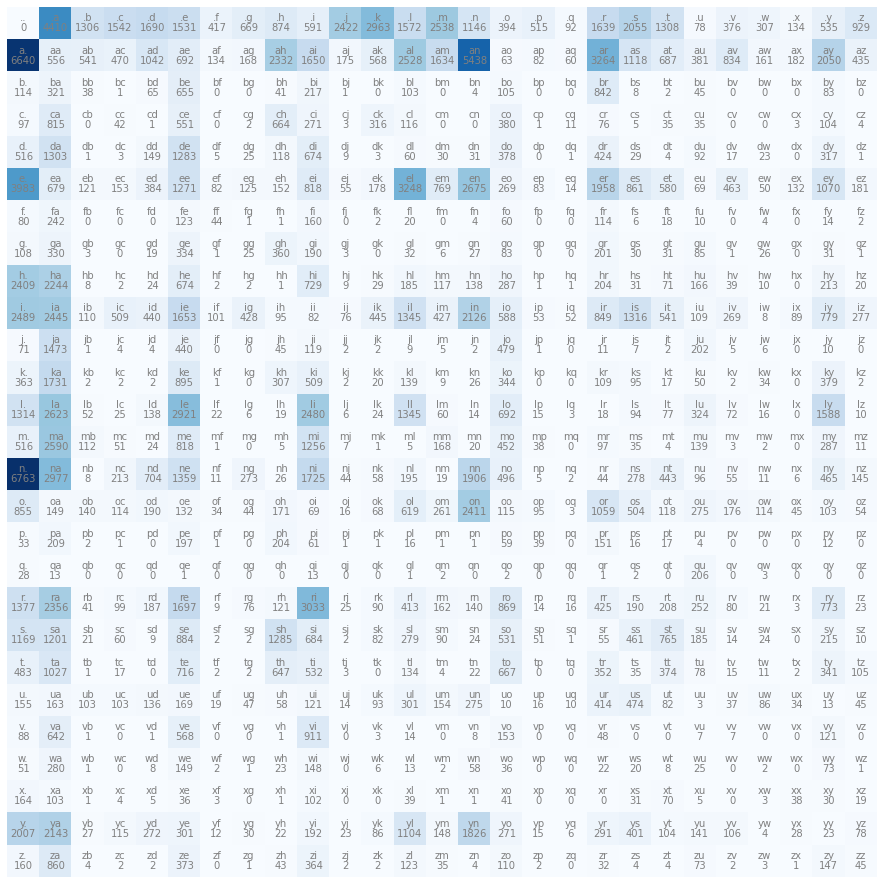

In [9]:
# Visualising the bigram table
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(bigram_table, cmap='Blues')
for i in range(n):
    for j in range(n):
        chstr = int_to_char[i] + int_to_char[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, '{0:.0f}'.format(bigram_table[i, j].item()), ha="center", va="top", color='gray')
plt.axis('off');

In [10]:
# Converting the bigram table into probabilities
P = bigram_table.float()
P /= P.sum(1, keepdims = True)

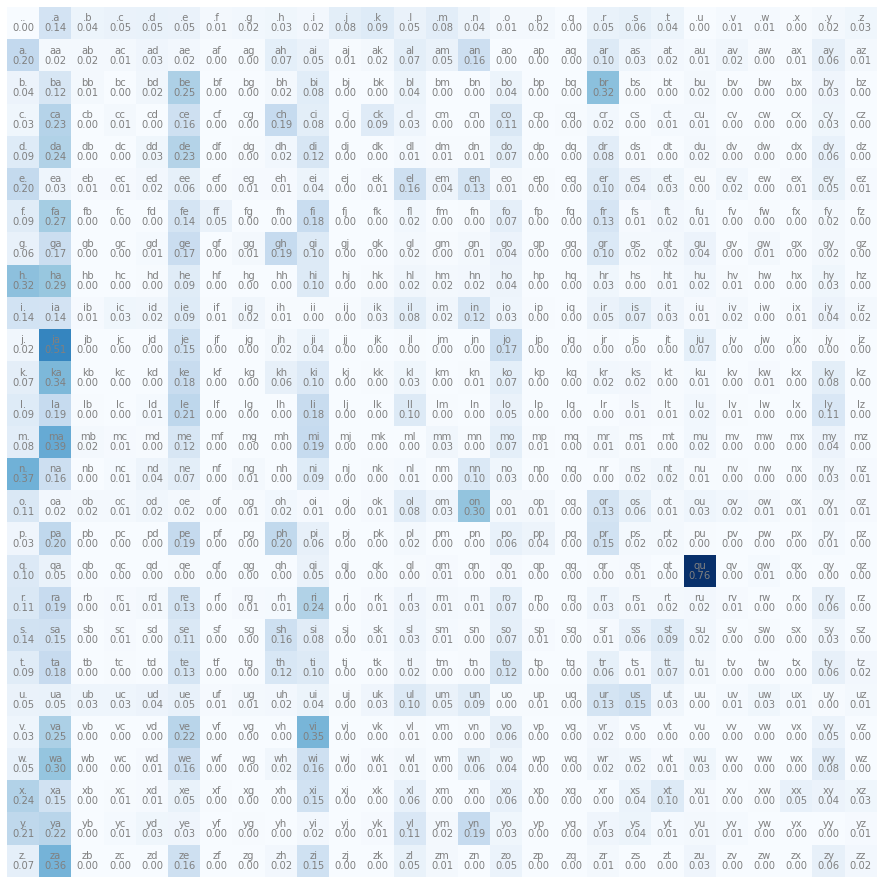

In [11]:
# Visualising the probabilities of the bigram table
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(bigram_table, cmap='Blues')
for i in range(n):
    for j in range(n):
        chstr = int_to_char[i] + int_to_char[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, '{0:.2f}'.format(P[i, j].item()), ha="center", va="top", color='gray')
plt.axis('off');

In [12]:
# Generate new names using the bigram table
generator = torch.Generator().manual_seed(2147483647)

for i in range(10):
    name = []
    input_seed = '.'
    ix = char_to_int[input_seed]

    while True:
        probs = P[ix]
        ix = torch.multinomial(probs, num_samples = 1, replacement = True, generator = generator).item()
        name.append(int_to_char[ix])
        if ix == 0:
            break
    print(''.join(name))

mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.
odaren.
iaddash.
h.
jhinatien.
egushl.


In [19]:
# How good is our model?

likelihood = 1
log_likelihood = 0

n = 0
for name in names[:3]:
    word = [TOKEN] + list(name) + [TOKEN]
    for ch1,ch2 in zip(word,word[1:]):
        ix1 = char_to_int[ch1]
        ix2 = char_to_int[ch2]
        prob = P[ix1,ix2]
        print(f"{ch1}{ch2} {prob:.4f}")
        likelihood *= prob
        log_likelihood += torch.log(prob)
        n += 1

print(f"{likelihood=}")
print(f"{log_likelihood=}")

negative_log_likelihood = -log_likelihood
normalized_negative_log_likelihood = negative_log_likelihood / n

print(f"{negative_log_likelihood=}")
print(f"{normalized_negative_log_likelihood=}")


.e 0.0478
em 0.0377
mm 0.0253
ma 0.3899
a. 0.1960
.o 0.0123
ol 0.0780
li 0.1777
iv 0.0152
vi 0.3541
ia 0.1381
a. 0.1960
.a 0.1377
av 0.0246
va 0.2495
a. 0.1960
likelihood=tensor(1.4309e-17)
log_likelihood=tensor(-38.7856)
negative_log_likelihood=tensor(38.7856)
normalized_negative_log_likelihood=tensor(2.4241)
